<center><h1><b><u><font color = "Black"> THE PROFESSIONAL CIPHER</font></h1></b></u></center>
<br>
<br>



# Bank loan approval analysis

<br>
<br>
<br>
<br>





This is a classification problem where we will do analysis whether a loan will be approved or not on diffeent categories of the loan applicants.

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_excel("data123.xlsx")

In [5]:
# Lets see the dataset

df.head()

,ID,Branch Code,Application In-take Date,Application Input Date,Applied Loan Amount,Applied Loan Tenor,Loan Purpose,Title,Gender,Age,...,Employment Type,Nature of Business,Job Position,Monthly Income,Office (Area),Date (Full Doc),Date (Pending Doc),Date (Pending Approval),Final_Status,Indicators
0,1,570,2012-04-11,2012-04-11 11:47:10,60000,24,Car Purchase,MR,M,22.301,...,Fixed Income Earner,Sales,Private,10245.0,2.0,NaT,NaT,NaT,Rejected,0
1,2,566,2012-04-11,2012-04-12 15:26:39,100000,60,Settle Loan / Credit Card O/S,MR,M,33.159,...,Fixed Income Earner,Services,Private,10000.0,1.0,NaT,NaT,NaT,Rejected,0
2,3,546,2012-04-12,2012-04-13 09:16:07,50000,24,Personal use,MS,F,28.389,...,Fixed Income Earner,Services,Private,9700.0,3.0,NaT,NaT,NaT,Rejected,0
3,4,548,2012-04-12,2012-04-13 00:00:00,70000,36,Personal use,MR,M,35.573,...,Civil Servant,Manager,Government/Semi-Government,23000.0,2.0,2012-04-13 10:09:10,2012-04-13 09:41:43,2012-04-16 14:47:16,Rejected,0
4,5,539,2012-04-13,2012-04-16 00:00:00,300000,60,Settle Loan / Credit Card O/S,MS,F,30.849,...,Fixed Income Earner,Manager,Private,34000.0,1.0,2012-04-16 15:12:31,2012-04-16 09:46:45,2012-04-16 15:14:36,Rejected,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        11669 non-null  int64         
 1   Branch Code               11669 non-null  int64         
 2   Application In-take Date  11669 non-null  datetime64[ns]
 3   Application Input Date    11669 non-null  datetime64[ns]
 4   Applied Loan Amount       11669 non-null  int64         
 5   Applied Loan Tenor        11669 non-null  int64         
 6   Loan Purpose              11661 non-null  object        
 7   Title                     11669 non-null  object        
 8   Gender                    11669 non-null  object        
 9   Age                       11669 non-null  float64       
 10  Marital Status            11669 non-null  object        
 11  Education Level           11669 non-null  object        
 12  Residential Status

In [7]:
df.describe()

,ID,Branch Code,Applied Loan Amount,Applied Loan Tenor,Age,Monthly Housing/Rental,Contract End Date,Monthly Income,Office (Area),Indicators
count,11669.00000,11669.000000,1.166900e+04,11669.000000,11669.000000,11669.000000,214.000000,1.166900e+04,11667.000000,11669.000000
mean,5835.00000,704.981832,2.488212e+05,30.191276,42.850267,3943.206255,42460.827103,4.699033e+04,1.932802,0.461993
std,3368.69448,162.876296,4.497168e+05,19.146560,10.500179,9443.975859,1024.975865,1.081102e+05,0.854357,0.498575
min,1.00000,533.000000,1.000000e+04,6.000000,18.052000,0.000000,41152.000000,0.000000e+00,1.000000,0.000000
25%,2918.00000,551.000000,6.000000e+04,12.000000,34.942000,0.000000,41958.000000,1.500000e+04,1.000000,0.000000
50%,5835.00000,576.000000,1.200000e+05,24.000000,43.129000,0.000000,42307.500000,2.500000e+04,2.000000,0.000000
75%,8752.00000,883.000000,2.730000e+05,48.000000,50.830000,4500.000000,42699.500000,4.800000e+04,3.000000,1.000000
max,11669.00000,883.000000,1.200000e+07,72.000000,82.436000,355940.000000,52022.000000,3.490722e+06,6.000000,1.000000


In [8]:
df.corr()

,ID,Branch Code,Applied Loan Amount,Applied Loan Tenor,Age,Monthly Housing/Rental,Contract End Date,Monthly Income,Office (Area),Indicators
ID,1.000000,-0.114155,0.078838,-0.099940,0.016499,0.058990,0.096560,0.057044,-0.023931,0.411229
Branch Code,-0.114155,1.000000,-0.093034,0.165514,-0.184727,-0.048313,0.050559,-0.071185,-0.039241,-0.219492
Applied Loan Amount,0.078838,-0.093034,1.000000,0.084397,0.071825,0.319958,0.055936,0.599442,-0.058561,0.139295
Applied Loan Tenor,-0.099940,0.165514,0.084397,1.000000,-0.180895,-0.068857,0.005849,-0.059903,0.056034,-0.319432
Age,0.016499,-0.184727,0.071825,-0.180895,1.000000,0.106735,-0.130344,0.097798,0.034700,0.034887
Monthly Housing/Rental,0.058990,-0.048313,0.319958,-0.068857,0.106735,1.000000,0.021123,0.313896,-0.063007,0.141889
Contract End Date,0.096560,0.050559,0.055936,0.005849,-0.130344,0.021123,1.000000,0.436136,-0.178618,-0.052307
Monthly Income,0.057044,-0.071185,0.599442,-0.059903,0.097798,0.313896,0.436136,1.000000,-0.059649,0.126947
Office (Area),-0.023931,-0.039241,-0.058561,0.056034,0.034700,-0.063007,-0.178618,-0.059649,1.000000,-0.058305
Indicators,0.411229,-0.219492,0.139295,-0.319432,0.034887,0.141889,-0.052307,0.126947,-0.058305,1.000000


In [9]:
df.dtypes

ID                                   int64
Branch Code                          int64
Application In-take Date    datetime64[ns]
Application Input Date      datetime64[ns]
Applied Loan Amount                  int64
Applied Loan Tenor                   int64
Loan Purpose                        object
Title                               object
Gender                              object
Age                                float64
Marital Status                      object
Education Level                     object
Residential Status                  object
Monthly Housing/Rental             float64
Contract Staff (Y/N)                object
Contract End Date                  float64
Employment Type                     object
Nature of Business                  object
Job Position                        object
Monthly Income                     float64
Office (Area)                      float64
Date (Full Doc)             datetime64[ns]
Date (Pending Doc)          datetime64[ns]
Date (Pendi

<br>
<br>
<br>



# CLEANING DATA

<BR>
    <BR>

In [125]:

col = ["ID","Branch Code","Application In-take Date","Applied Loan Amount","Applied Loan Tenor","Loan Purpose","Gender","Age","Marital Status","Education Level","Residential Status","Monthly Housing/Rental","Contract Staff (Y/N)","Employment Type","Nature of Business","Job Position","Monthly Income","Office (Area)","Final_Status","Indicators"]

In [126]:
loan = df[col]

In [11]:
loan.head()

,ID,Branch Code,Application In-take Date,Applied Loan Amount,Applied Loan Tenor,Loan Purpose,Gender,Age,Marital Status,Education Level,Residential Status,Monthly Housing/Rental,Contract Staff (Y/N),Employment Type,Nature of Business,Job Position,Monthly Income,Office (Area),Final_Status,Indicators
0,1,570,2012-04-11,60000,24,Car Purchase,M,22.301,Single,Secondary,Live With Relatives,0.0,N,Fixed Income Earner,Sales,Private,10245.0,2.0,Rejected,0
1,2,566,2012-04-11,100000,60,Settle Loan / Credit Card O/S,M,33.159,Single,Form 3 or below,Live With Relatives,0.0,N,Fixed Income Earner,Services,Private,10000.0,1.0,Rejected,0
2,3,546,2012-04-12,50000,24,Personal use,F,28.389,Married,University,Rental,2000.0,N,Fixed Income Earner,Services,Private,9700.0,3.0,Rejected,0
3,4,548,2012-04-12,70000,36,Personal use,M,35.573,Married,Post Graduate,Rental,1200.0,N,Civil Servant,Manager,Government/Semi-Government,23000.0,2.0,Rejected,0
4,5,539,2012-04-13,300000,60,Settle Loan / Credit Card O/S,F,30.849,Single,University,Mortgaged Private Housing,11000.0,N,Fixed Income Earner,Manager,Private,34000.0,1.0,Rejected,0


### COUNTING REJECTED AND ACCEPTED APPLICANTS

.

In [12]:
# bar plot to visualize the frequency
loan["Final_Status"].value_counts()

Rejected             6278
Apvd_Drawdown        5345
Apvd_Pending_Draw      46
Name: Final_Status, dtype: int64

<br><br>

## So we see that Rejected Number of Appication are 6278


## So we see that  Apvd_Drawdown  of Appication are 5345


## So we see that  Apvd_Pending_Draw of Appication are 46



<br>
<br>

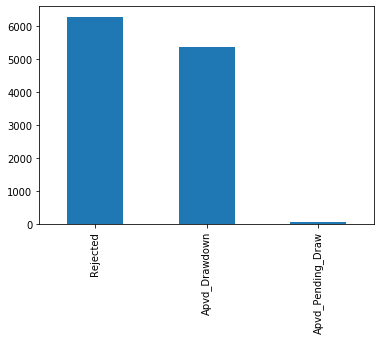

In [13]:
loan["Final_Status"].value_counts().plot.bar()

Lets Analyse with variable with are binary that is to use Gender, Age, Marital Status.


<br>
<br>
<br>

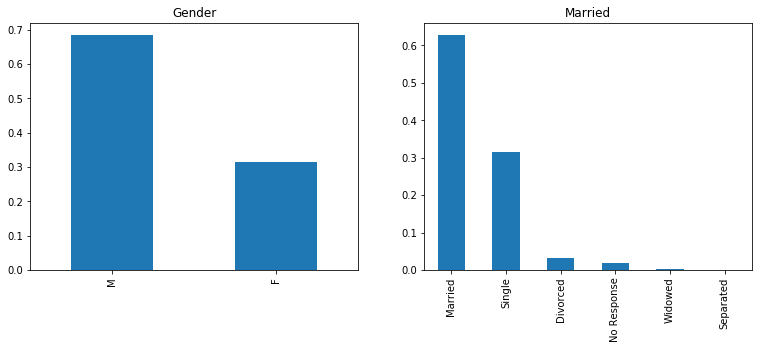

In [14]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
loan['Marital Status'].value_counts(normalize=True).plot.bar(title= 'Married')



plt.show()

### We see that 68% of loan Application is given by Male.

### we see that around 62% loan application are given by Married.


<br>

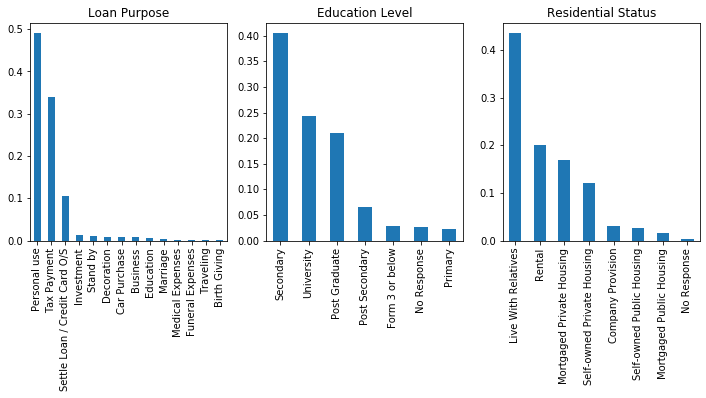

In [15]:
plt.subplot(131)
loan['Loan Purpose'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Loan Purpose')


plt.subplot(132)
loan['Education Level'].value_counts(normalize=True).plot.bar(title= 'Education Level')

plt.subplot(133)
loan['Residential Status'].value_counts(normalize=True).plot.bar(title= 'Residential Status')




plt.show()

<br>

### 1) From the above Analysis we see that around 50% of the loan applicants take loan for Personal Use.

### 2) From the above Analysis we see that around 40% of the loan applicants have done there education till Secoundry Schooling.

### 3) From the above Analysis we see that around 45% of the loan applicants Live with there Relatives.


<br>
<br>

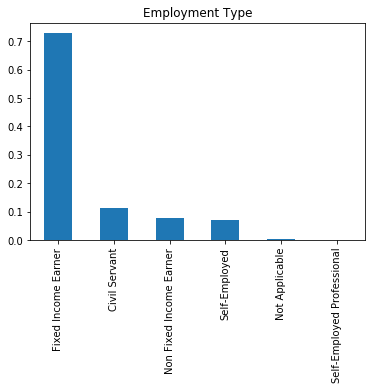

In [16]:
plt.subplot(111)
loan['Employment Type'].value_counts(normalize=True).plot.bar(title= 'Employment Type')

<br>
<br>

### Here From the above Analysis we see that around 72% of the loan applicants are Fixed Income Earner.

<br>
<br>



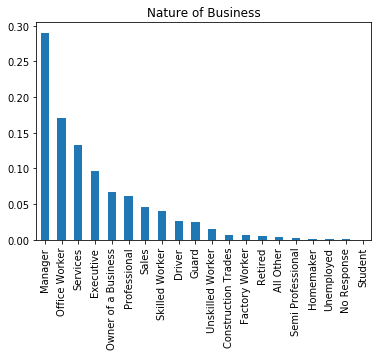

In [17]:
plt.subplot(111)
loan['Nature of Business'].value_counts(normalize=True).plot.bar(title= 'Nature of Business')

<br>

## Here From the above Analysis we see that around 28% of the loan applicants are Manager and around 18% are Office Workers.

<br>

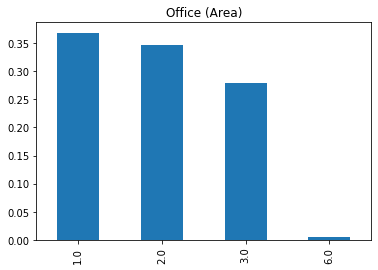

In [18]:
plt.subplot(111)
loan['Office (Area)'].value_counts(normalize=True).plot.bar(title= 'Office (Area)')

### Here we see that around 37% of the people applied for loan are from office area 1 while 35% are from office area 2

<br>

## Now let’s look at the distribution of Loan Tenor variable.

In [22]:
loan['Applied Loan Tenor'].value_counts().to_frame('Total_Applicants').rename_axis('Mounths')

,Total_Applicants
Mounths,
12,3719
24,2375
60,2174
36,1397
48,920
18,446
6,427
72,211


<br>

## Above we can se total Applicants with there tenure time period.

<br>

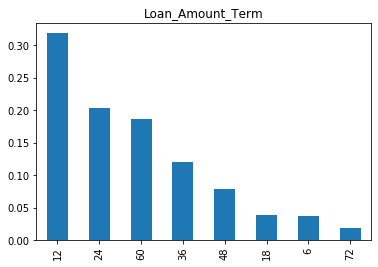

In [23]:
loan['Applied Loan Tenor'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

## . Here graphically we can see that around 32% of the applicants have a tenure of 12 months. And around 20% have a tenure of 24 months.

<br>
<br>

<h1><center><font color="blue">Lets See how different variables changes the Target variables</font></center></h1>

Final_Status  Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Gender                                                  
F                      1771                 13      1889
M                      3574                 33      4389


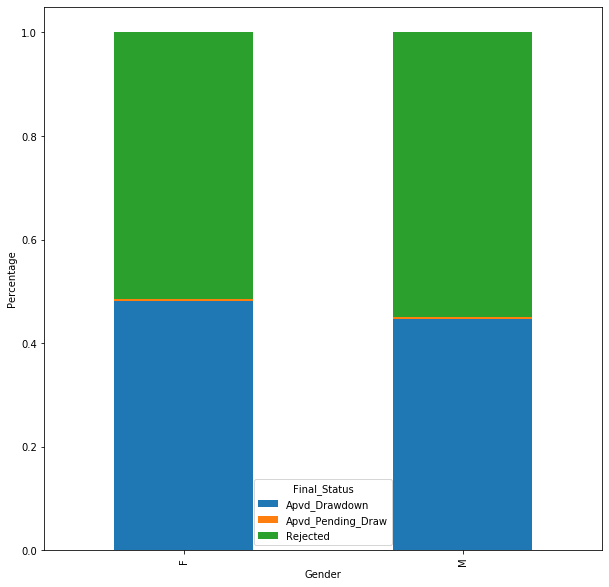

In [24]:

print(pd.crosstab(loan['Gender'],loan['Final_Status']))

Gender = pd.crosstab(loan['Gender'],loan['Final_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Final_Status    Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Marital Status                                            
Divorced                  109                  1       270
Married                  3571                 33      3735
No Response               104                  0       113
Separated                   3                  0         6
Single                   1543                 12      2132
Widowed                    15                  0        22


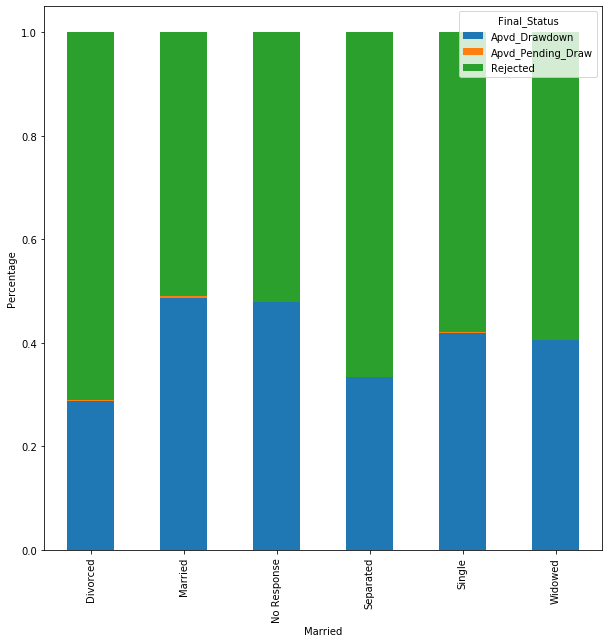

In [25]:

print(pd.crosstab(loan['Marital Status'],loan['Final_Status']))

Married = pd.crosstab(loan['Marital Status'],loan['Final_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Final_Status                Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Employment Type                                                       
Civil Servant                         940                  3       380
Fixed Income Earner                  3786                 38      4678
Non Fixed Income Earner               333                  4       574
Not Applicable                         13                  0        53
Self-Employed                         264                  1       583
Self-Employed Professional              9                  0        10


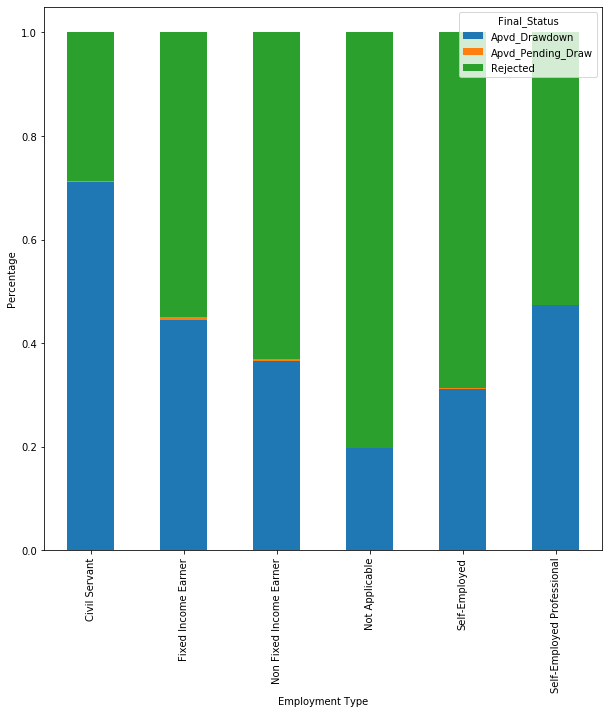

In [26]:
print(pd.crosstab(loan['Employment Type'],loan['Final_Status']))

Dependents=pd.crosstab(loan['Employment Type'],loan['Final_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,10))
plt.xlabel('Employment Type')
p = plt.ylabel('Percentage')

Final_Status     Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Education Level                                            
Form 3 or below             57                  0       270
No Response                149                  2       150
Post Graduate             1618                 11       832
Post Secondary             354                  4       402
Primary                     38                  1       234
Secondary                 1565                 14      3139
University                1564                 14      1251


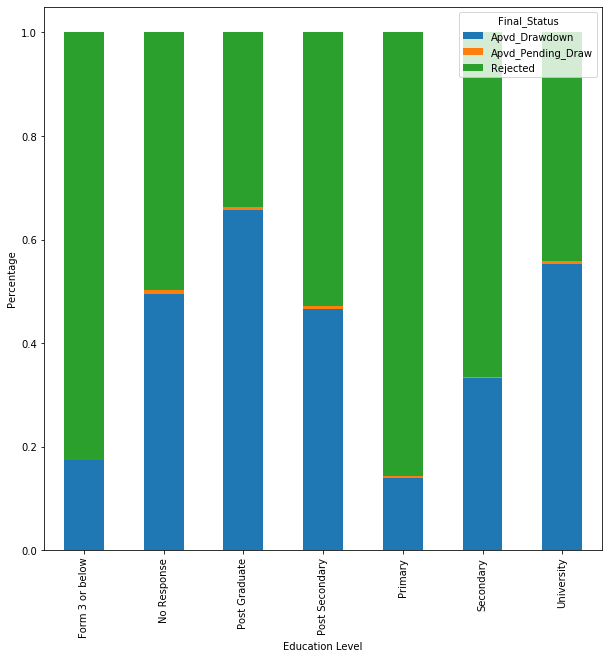

In [27]:
print(pd.crosstab(loan['Education Level'],loan['Final_Status']))

Dependents=pd.crosstab(loan['Education Level'],loan['Final_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,10))
plt.xlabel('Education Level')
p = plt.ylabel('Percentage')

Final_Status                Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Job Position                                                          
Government/Semi-Government           1028                  4       424
Homemaker                               0                  0        19
No Response                             0                  0         9
Private                              3990                 41      5143
Public                                 40                  0        61
Retired                                22                  0        40
Self Employed                         265                  1       572
Student                                 0                  0         3
Unemployed                              0                  0         7


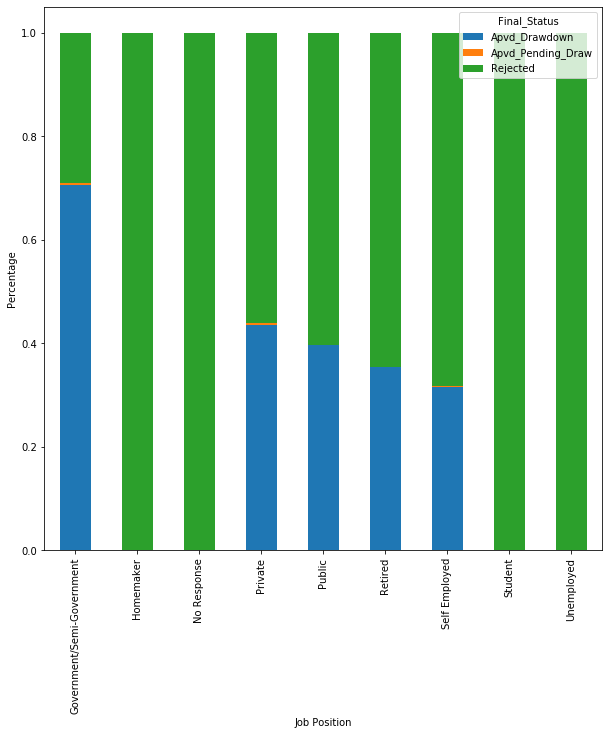

In [28]:
print(pd.crosstab(loan['Job Position'],loan['Final_Status']))

Dependents=pd.crosstab(loan['Job Position'],loan['Final_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,10))
plt.xlabel('Job Position')
p = plt.ylabel('Percentage')

Final_Status         Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Nature of Business                                             
All Other                       13                  0        39
Construction Trades             13                  0        70
Driver                          87                  2       225
Executive                      759                  6       354
Factory Worker                   8                  0        65
Guard                           72                  3       221
Homemaker                        0                  0        21
Manager                       1871                 15      1500
No Response                      0                  0         6
Office Worker                  908                 11      1068
Owner of a Business            240                  1       535
Professional                   471                  2       246
Retired                         22                  0        48
Sales                          174      

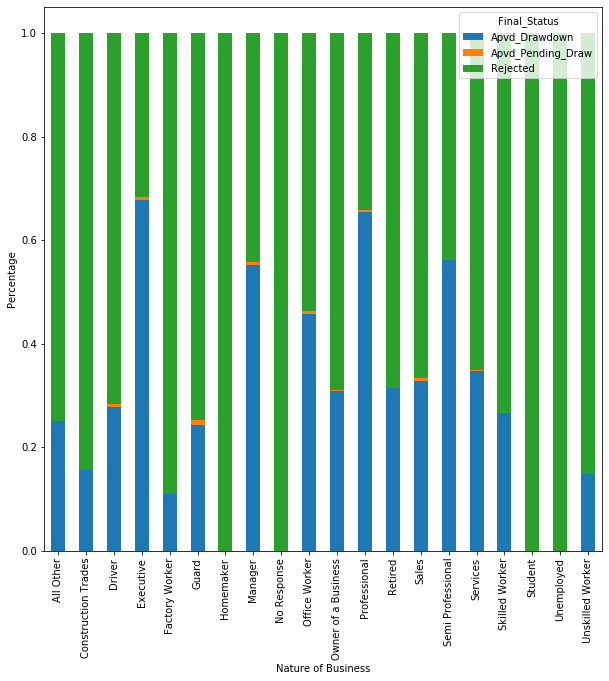

In [29]:
print(pd.crosstab(loan['Nature of Business'],loan['Final_Status']))

Dependents=pd.crosstab(loan['Nature of Business'],loan['Final_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,10))
plt.xlabel('Nature of Business')
p = plt.ylabel('Percentage')

Final_Status                   Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Loan Purpose                                                             
Birth Giving                               2                  0         5
Business                                  18                  0        78
Car Purchase                              37                  2        67
Decoration                                36                  0        75
Education                                 18                  0        46
Funeral Expenses                           3                  0        13
Investment                                44                  1       108
Marriage                                  15                  0        33
Medical Expenses                           1                  0        22
Personal use                            2031                 38      3643
Settle Loan / Credit Card O/S            203                  4      1023
Stand by                              

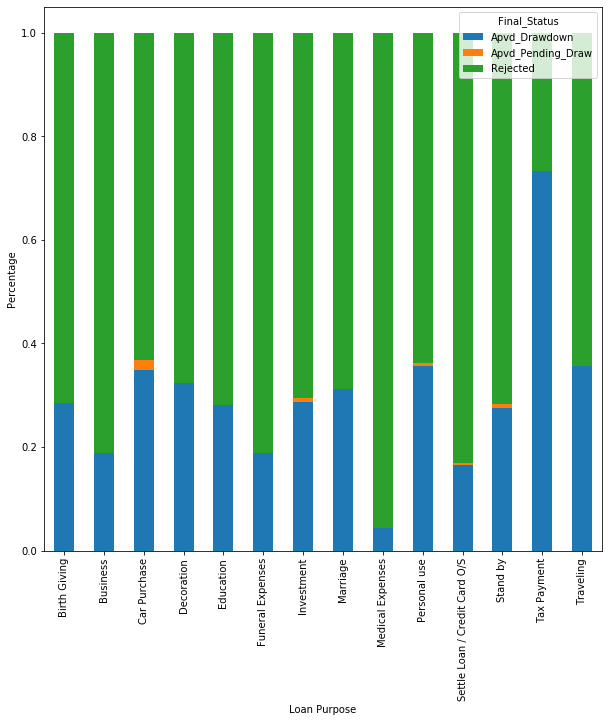

In [30]:
print(pd.crosstab(loan['Loan Purpose'],loan['Final_Status']))

Dependents=pd.crosstab(loan['Loan Purpose'],loan['Final_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,10))
plt.xlabel('Loan Purpose')
p = plt.ylabel('Percentage')

### FROM THE BAR CHARTS ABOVE WE CAN SAY THAT - :

. Male and Female have quite similar chance of getting the loan.<br>
. Married people have 50% chance of getting the loan approved.<br>
. Civil servents have the most chance of getting the loan approved.<br>
. People who are post Graduate or have a University degree have the most chance of getting loan appproved.<br>
. People with Government/Semi-government have 70% chance of getting there Loan Approved.<br>
. In business line people who are Executive and Professional have the most chance of getting the loan that is around 70%.<br>
. People who take loan for Tax Payment purpose have the major chance of getting the loan that is around 72%.

<br>
<br>





### The mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Final_Status
Apvd_Drawdown        62041.835747
Apvd_Pending_Draw    33699.785652
Rejected             34273.071891
Name: Monthly Income, dtype: float64


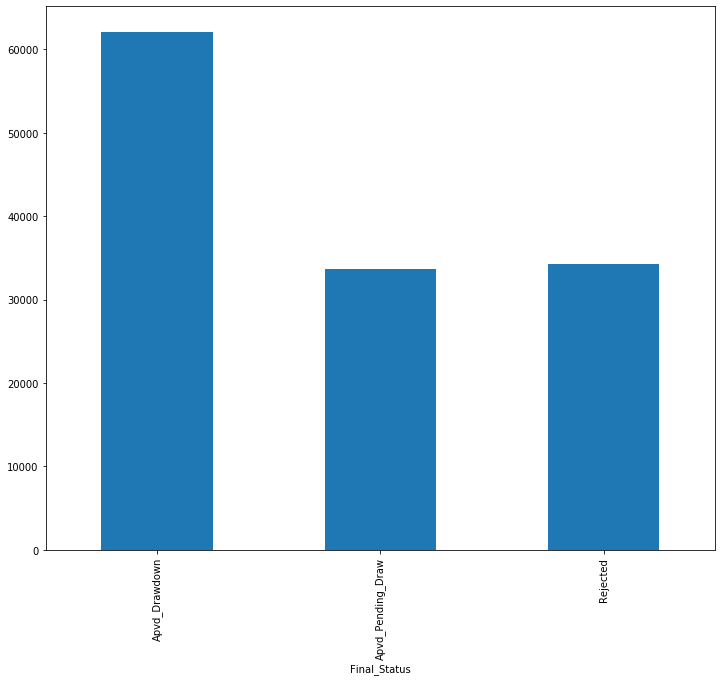

In [31]:
print(loan.groupby('Final_Status')['Monthly Income'].mean())
plt.figure(figsize=(12,10))
loan.groupby('Final_Status')['Monthly Income'].mean().plot.bar()

Here the y-axis represents the mean applicant income.From the analysis I can conclude that majority of the people whose loan is approved have there income greater than 60000.

## For more accurate analysis making bins of income

In [32]:
loan['Monthly Income'].max()

3490722.0

In [33]:
bins = [0,25000,50000,100000,810000]
group = ['Low','Average','High', 'Very high']
loan['Income_category'] = pd.cut(df['Monthly Income'],bins,labels=group)


In [34]:
loan.head()

,ID,Branch Code,Application In-take Date,Applied Loan Amount,Applied Loan Tenor,Loan Purpose,Gender,Age,Marital Status,Education Level,...,Monthly Housing/Rental,Contract Staff (Y/N),Employment Type,Nature of Business,Job Position,Monthly Income,Office (Area),Final_Status,Indicators,Income_category
0,1,570,2012-04-11,60000,24,Car Purchase,M,22.301,Single,Secondary,...,0.0,N,Fixed Income Earner,Sales,Private,10245.0,2.0,Rejected,0,Low
1,2,566,2012-04-11,100000,60,Settle Loan / Credit Card O/S,M,33.159,Single,Form 3 or below,...,0.0,N,Fixed Income Earner,Services,Private,10000.0,1.0,Rejected,0,Low
2,3,546,2012-04-12,50000,24,Personal use,F,28.389,Married,University,...,2000.0,N,Fixed Income Earner,Services,Private,9700.0,3.0,Rejected,0,Low
3,4,548,2012-04-12,70000,36,Personal use,M,35.573,Married,Post Graduate,...,1200.0,N,Civil Servant,Manager,Government/Semi-Government,23000.0,2.0,Rejected,0,Low
4,5,539,2012-04-13,300000,60,Settle Loan / Credit Card O/S,F,30.849,Single,University,...,11000.0,N,Fixed Income Earner,Manager,Private,34000.0,1.0,Rejected,0,Average


<br>
<br>




## I have added a new column Income_category at the last indicating the category of people monthly income.

<br>

Final_Status     Apvd_Drawdown  Apvd_Pending_Draw  Rejected
Income_category                                            
Low                       1900                 21      3825
Average                   1713                 13      1485
High                      1129                 12       596
Very high                  573                  0       254


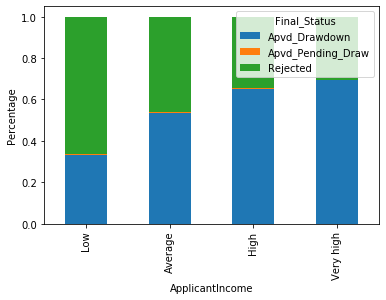

In [35]:
print(pd.crosstab(loan['Income_category'],loan['Final_Status']))

Income_category = pd.crosstab(loan['Income_category'],loan['Final_Status'])
Income_category.div(Income_category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

## So, People with High and Very high Income have more chances to get the loan.


<br>

Final_Status
Apvd_Drawdown        316603.086997
Apvd_Pending_Draw    295000.000000
Rejected             190774.307104
Name: Applied Loan Amount, dtype: float64


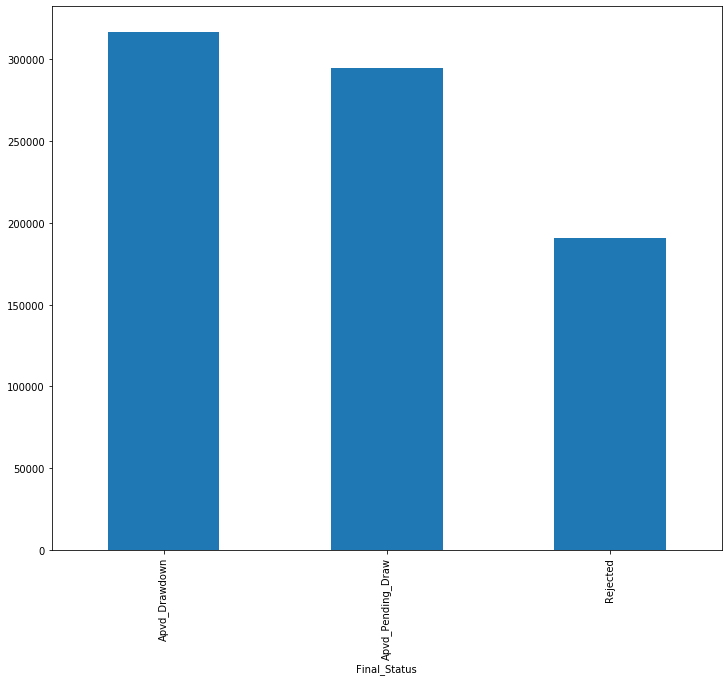

In [36]:
print(loan.groupby('Final_Status')['Applied Loan Amount'].mean())
plt.figure(figsize=(12,10))
loan.groupby('Final_Status')['Applied Loan Amount'].mean().plot.bar()

# For more accurate analysis making bins of Applied Loan Amount.


In [37]:
loan['Applied Loan Amount'].max()

12000000

In [38]:
# making bins for LoanAmount variable
bins = [0,20000,50000,70000,1500000]
group = ['Low','Average','High','Very High']
loan['LoanAmount'] = pd.cut(df['Applied Loan Amount'],bins,labels=group)

Final_Status  Apvd_Drawdown  Apvd_Pending_Draw  Rejected
LoanAmount                                              
Low                     314                  4       462
Average                 565                  8      1158
High                    227                  1       367
Very High              4106                 33      4266


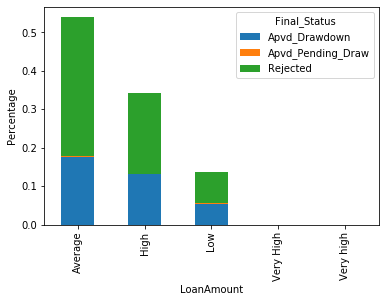

In [41]:
print(pd.crosstab(loan['LoanAmount'],loan['Final_Status']))

LoanAmount = pd.crosstab(loan['LoanAmount'],loan['Final_Status'])
LoanAmount.div(Income_category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

## We can see that Average loan amout that is 20000 to 50000 have the most chance of getting approved by the bank.


<br>
<br>


<center><h1>                          ------- END -------  